# PDI
Eduardo Henrique Farias Silva
## Filtragem no domínio da frequência 1

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

> Load images

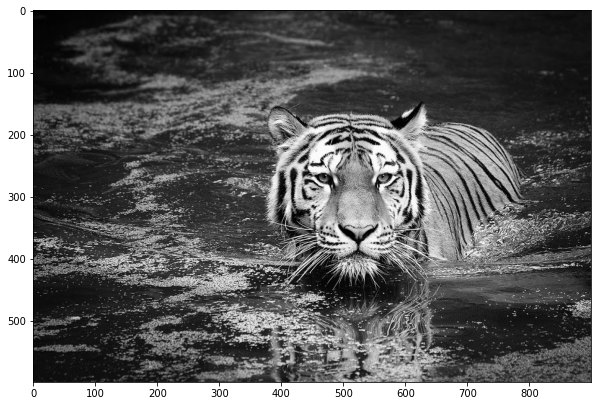

In [2]:
image = cv2.imread('/content/datasets/tiger.jpg', 0)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### Fast Fourier Transform using OpenCV

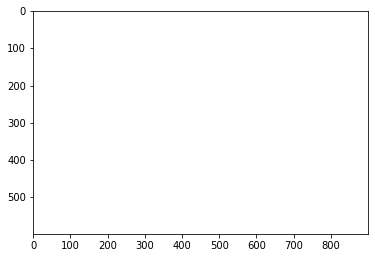

In [3]:
dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
mag = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(mag, cv2.COLOR_BGR2RGB), cmap='gray')
plt.show()

### Fast Fourier Transform using NumPy

> FFT 

$Re\{F(u, v)\}$ e $Im\{F(u, v)\}$, onde $F(u, v)$ é transforma de Fourier de $f(x, y)$.

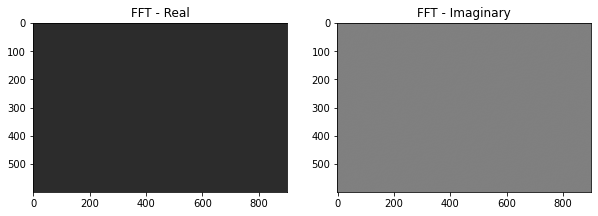

In [4]:
f = np.fft.fft2(image)
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1); plt.imshow(f.real, cmap='gray')
plt.title('FFT - Real')
plt.subplot(1,2,2); plt.imshow(f.imag, cmap='gray')
plt.title('FFT - Imaginary')
plt.show()

> $|F(u, v)|$

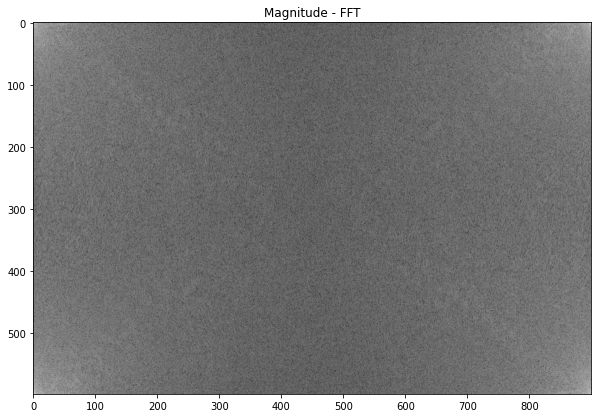

In [5]:
mag = 20 * np.log(np.abs(f))
plt.figure(figsize=(10, 10))
plt.imshow(mag, cmap='gray')
plt.title('Magnitude - FFT')
plt.show()

> FFT shift

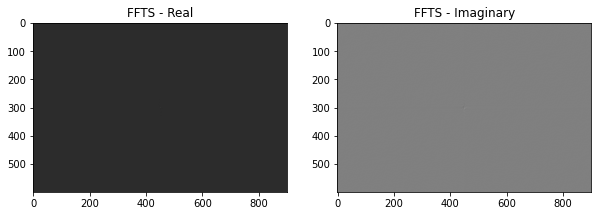

In [6]:
f_shift = np.fft.fftshift(f)
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1); plt.imshow(f_shift.real, cmap='gray')
plt.title('FFTS - Real')
plt.subplot(1,2,2); plt.imshow(f_shift.imag, cmap='gray')
plt.title('FFTS - Imaginary')
plt.show()

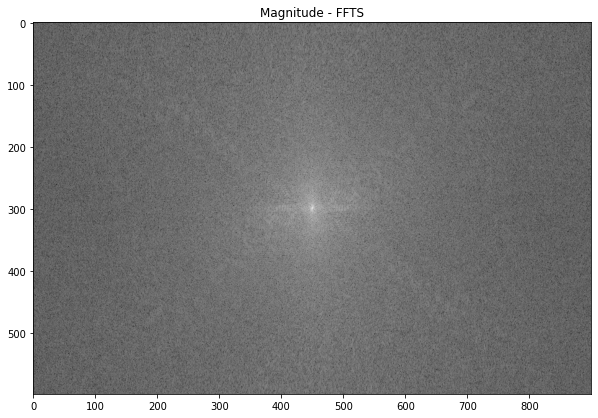

In [7]:
mag = 20 * np.log(np.abs(f_shift))
plt.figure(figsize=(10, 10))
plt.imshow(mag, cmap='gray')
plt.title('Magnitude - FFTS')
plt.show()

### Escalonamento da magnitude

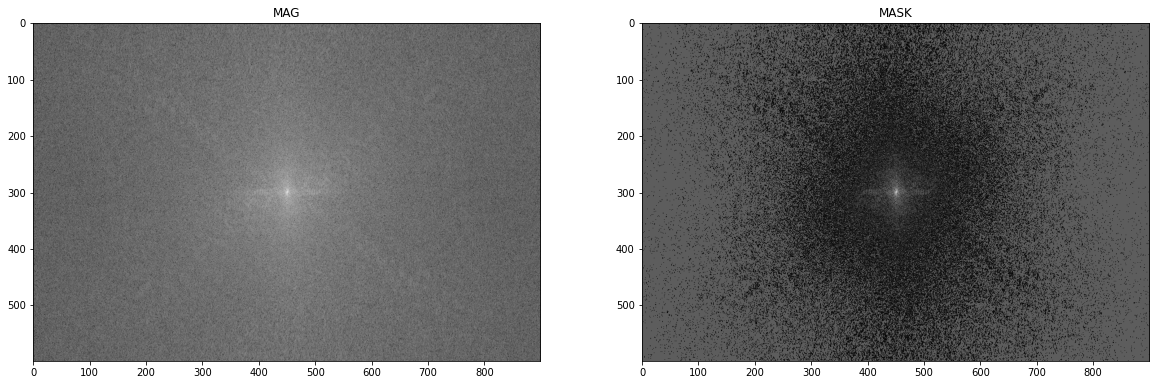

In [8]:
mask = mag.copy()
mask[mask < 200] = 255

plt.figure(figsize=(20, 20))
plt.subplot(1,2,1); plt.imshow(mag, cmap='gray')
plt.title('MAG')
plt.subplot(1,2,2); plt.imshow(mask, cmap='gray')
plt.title('MASK')
plt.show()

### Lowpass filter

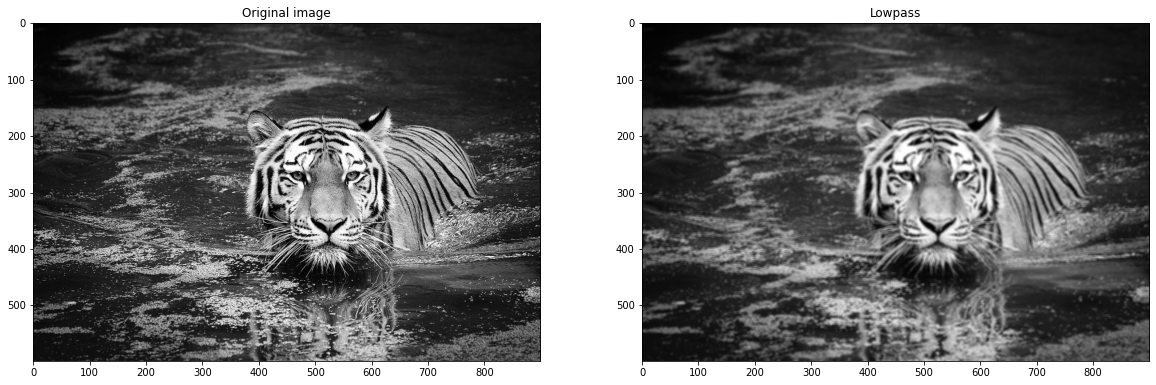

In [9]:
mask = cv2.getGaussianKernel(5, 10)
gaussian = mask * mask.T
filtered_img = cv2.filter2D(image, -1, gaussian)

plt.figure(figsize=(20, 20))
plt.subplot(1,2,1); plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2); plt.imshow(filtered_img, cmap='gray')
plt.title('Lowpass')
plt.show()

### Highpass filter

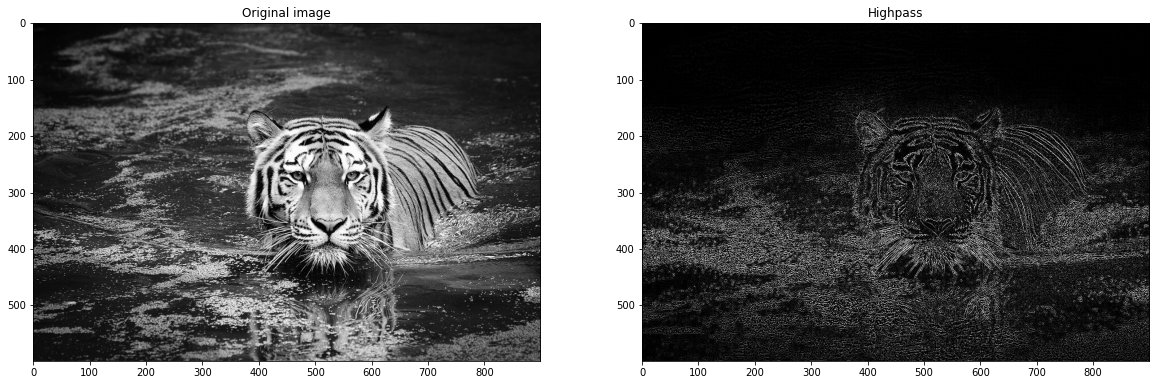

In [10]:
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filtered_img = cv2.filter2D(image, None, laplacian)

plt.figure(figsize=(20, 20))
plt.subplot(1,2,1); plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2); plt.imshow(filtered_img, cmap='gray')
plt.title('Highpass')
plt.show()